# EDA - Exploratory Data Analysis

## The purpose of this EDA is to understand the patterns, trends, background of the data, and seek new insights via this analysis before building models for testing.
### Steps are taken below:
1) Load data
2) Identify data quality issues
3) Handle missing data
4) Examine data distribution
5) Detect and handle outliers
6) Feature engineering
7) Analyse relationship between variables
8) Bivariate and multivariate analysis
9) Summary of findings
10) Export Clean Dataset

## 1. Load data

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db=sql.connect("C:/Users/gshbo/Documents/AI Materials/Lung Cancer Analysis/data/lung_cancer.db") #Connect to SQLite db file
sql_table = """SELECT name FROM sqlite_master WHERE type='table';""" #SQL query to retrieve names of all tables in db file
cursor=db.cursor() 
c = cursor.execute(sql_table) #Executes SQL query stored in variable 'sql_table'
print(c.fetchall()) #Fetches names of all tables in db file

[('lung_cancer',)]


In [3]:
post= """ SELECT * FROM lung_cancer""" #Stores SQL query retrieving all rows and columns from table 'lung_cancer'
data=pd.read_sql(post,db) #Execute SQL query stored in variable 'post' and load results into a pandas dataframe 
data.head(50)

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
5,1.175068e+18,49,Male,Yes,Present,Low,67,60,2001,Still Smoking,Yes,Medium,Right,0
6,1.610044e+18,57,Male,Yes,Present,Medium,67,58,1982,2020,Yes,None / Low,Right,0
7,6.987460e+17,50,Male,No,Not Present,High,91,95,1996,Still Smoking,No,Medium,Right,1
8,6.980264e+17,67,Male,No,Not Present,High,86,80,1959,Still Smoking,None,Medium,Left,1
9,1.468042e+18,68,Male,Yes,Not Present,Low,45,46,2020,2022,Yes,Medium,Right,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10348.0,1.150782e+18,6.673316e+17,4.137510e+13,5.654776e+17,1.153193e+18,1.721061e+18,2.305810e+18
Age,10348.0,6.122275e+01,2.370827e+01,-1.040000e+02,5.400000e+01,6.400000e+01,7.400000e+01,1.200000e+02
Last Weight,10348.0,7.240104e+01,1.613650e+01,4.500000e+01,5.900000e+01,7.200000e+01,8.600000e+01,1.000000e+02
Current Weight,10348.0,6.941622e+01,1.688050e+01,3.600000e+01,5.600000e+01,6.900000e+01,8.200000e+01,1.150000e+02
Lung Cancer Occurrence,10348.0,5.440665e-01,4.980784e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


* Data consists mainly demographical and lung_cancer medical history of patients
* db file is assumed to be attained from an entity in the healthcare industry
* Null values found in features 'COPD History', 'Air pollution exposure' and 'Taken Bronchodilators'
* Negative values identified in feature 'Age'
* Feature 'ID' deemed as redundant to this analysis.

## 2. Identify data quality issues

In [6]:
def check_cat_feature_format(data, features, normalize=False, dropna=False):
    '''
    Apply value_counts() to multiple categorical features in a DataFrame while retaining None/NAN values.

    Parameters:
    -----------
    - data (pd.DataFrame): The input DataFrame
    - features (list): list of column names to apply value_counts()
    - normalize (bool): If True, retain relative frequencies. Default is False.

    Returns:
    --------
    - dict: A dictionary where keys are feature names and values are Series of value counts.
    '''
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a DataFrame")
    
    if not isinstance(features, list):
        raise ValueError("Features must be provided as a list of column names")
    
    value_counts_dict = {}

    for feature in features:
        if feature in data.columns:
            #Apply value_counts with dropna=False to retain None/NaN
            value_counts_dict[feature] = data[feature].value_counts(
                normalize=False, dropna=False
            )
        else:
            raise KeyError(f"Feature '{feature} not found in DataFrame")
        
    return value_counts_dict

cat_features = ['Gender', 'COPD History', 'Genetic Markers', 'Air Pollution Exposure',
                'Taken Bronchodilators','Frequency of Tiredness', 'Dominant Hand', 'Lung Cancer Occurrence']

check_cat_feature_format(data=data, features=cat_features)

{'Gender': Gender
 Male      5653
 Female    4152
 MALE       324
 FEMALE     218
 NAN          1
 Name: count, dtype: int64,
 'COPD History': COPD History
 Yes     5691
 No      3545
 None    1112
 Name: count, dtype: int64,
 'Genetic Markers': Genetic Markers
 Not Present    7785
 Present        2563
 Name: count, dtype: int64,
 'Air Pollution Exposure': Air Pollution Exposure
 High      6283
 Low       2412
 Medium    1650
 None         3
 Name: count, dtype: int64,
 'Taken Bronchodilators': Taken Bronchodilators
 Yes     5742
 No      3545
 None    1061
 Name: count, dtype: int64,
 'Frequency of Tiredness': Frequency of Tiredness
 None / Low    4813
 Medium        2768
 High          2767
 Name: count, dtype: int64,
 'Dominant Hand': Dominant Hand
 Right        6895
 Left         1747
 RightBoth    1706
 Name: count, dtype: int64,
 'Lung Cancer Occurrence': Lung Cancer Occurrence
 1    5630
 0    4718
 Name: count, dtype: int64}

In [7]:
import json

# Define mappings for replacement and save mapping list dynamically into JSON file
replace_mappings = {
    'Start Smoking': {'Not Applicable': 0},
    'Stop Smoking': {'Not Applicable': 0, 'Still Smoking': 2023},
    'Gender': {'FEMALE': 'Female', 'MALE': 'Male'},
    'Dominant Hand': {'RightBoth': 'Right'},
    'COPD History': {'None': 'No', None: 'No'},
    'Taken Bronchodilators': {'None': 'No'},
    'Air Pollution Exposure': {'None': 'Low', None: 'Low'},
    'Frequency of Tiredness': {'None / Low': 'Low'}
}

with open("replace_mapping.json", "w") as json_file:
    json.dump(replace_mappings, json_file, indent=4) # indent=4 makes it readable
    
#Standardize data format across features and fill missing values
data.replace(replace_mappings, inplace=True)
data.fillna({
    'COPD History': 'No',
    'Taken Bronchodilators': 'No',
    'Air Pollution Exposure': 'Low'
})

# Transform data types for binary target feature and smoking features
data = data.astype({
    'Lung Cancer Occurrence': 'object',
    'Start Smoking': 'int',
    'Stop Smoking': 'int'
})
print(data.dtypes)
print('')
print(data.isnull().sum())

ID                        float64
Age                         int64
Gender                     object
COPD History               object
Genetic Markers            object
Air Pollution Exposure     object
Last Weight                 int64
Current Weight              int64
Start Smoking               int32
Stop Smoking                int32
Taken Bronchodilators      object
Frequency of Tiredness     object
Dominant Hand              object
Lung Cancer Occurrence     object
dtype: object

ID                           0
Age                          0
Gender                       0
COPD History                 0
Genetic Markers              0
Air Pollution Exposure       0
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1061
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64


In the above stated features, None and 'None' values are not treated as N/A. In the context where COPD History and Bronchodilators consumption are asked,
if the patient chose to leave the question unanswered or states as 'None', it will be assumed as the answer 'No'.
For features 'Air Pollution Exposure' and 'Frequency of Tiredness', it will be assumed as 'Low'. Since air pollution cannot be fully prevented, it is only reasonable that the exposure is low.
It is also impossible to have totally no frequency of tiredness, hence the value will be assumed as 'Low'. 

In [8]:
# Check for duplicates
data.duplicated().sum()

350

* Since this dataset is compiled in relation to lung cancer, duplicated data is deemed as reasonable and will be retained as it is.

## 3. Handle missing data
* NAN value in feature 'Gender' is deemed as missing value since the nature of the answer to the question is binary and can only be 'Male' or 'Female'.

In [9]:
# Transform 'NAN value to None in Gender
data['Gender'] = data['Gender'].replace('NAN', None)
# Drop null value and redundant feature 'ID' irrelevant to this analysis
data = data.dropna().drop('ID', axis=1)

Based on the above boxplot:
* Only feature 'Age' has negative outliers
* There are evidence of elderlies of age above 100 as per domain knowledge
* Outliers above value 0 will be retained as it is
* Outliers below value 0 would represent negative values and will be converted to positive values since it is impossible for human age to be negative

## 4. Examine data distribution

In [10]:
#Categorise features into categorical and numerical data excluding target feature
binary_features = ['COPD History', 'Genetic Markers', 'Taken Bronchodilators']
nominal_features = ['Gender', 'Dominant Hand']
ordinal_features = ['Air Pollution Exposure', 'Frequency of Tiredness']
numerical_features = ['Age', 'Last Weight', 'Current Weight', 'Start Smoking', 'Stop Smoking']
Target_feature = ['Lung Cancer Occurrence']

In [11]:
def bar_plot(cols, rows, feature, plot):
    '''
    Plot bar charts to examine data distribution across binary and numerical features.

    Parameters:
    -----------
    - cols (Variable): Number of columns showcasing the feature plots in the pane
    - rows (Variable): Number of rows showcasing the feature plots in the pane
    - feature (str or series): The feature in DataFrame
    - plot (function): The type of plot to use for the selected features 

    Returns:
    --------
    - A single pane containing multiple bar plots showcasing various data distributions of binary and numerical features

    '''
    fig = plt.figure(figsize = (cols*5, rows*5))

    for i, col in enumerate(feature):
        ax = fig.add_subplot(rows, cols, i + 1)
        plot(x = data[col], ax = ax)
    fig.tight_layout()
    plt.show()

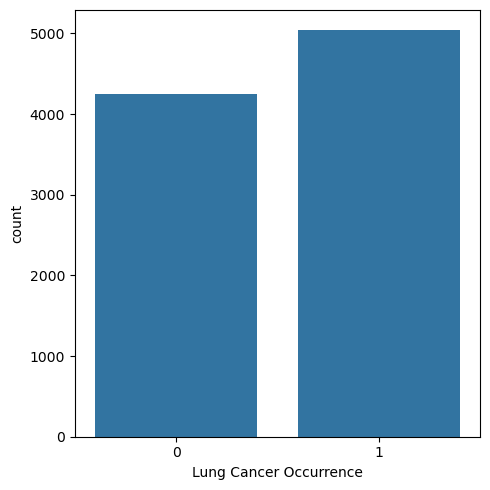

In [12]:
bar_plot(1, 1, data[Target_feature], sns.countplot)

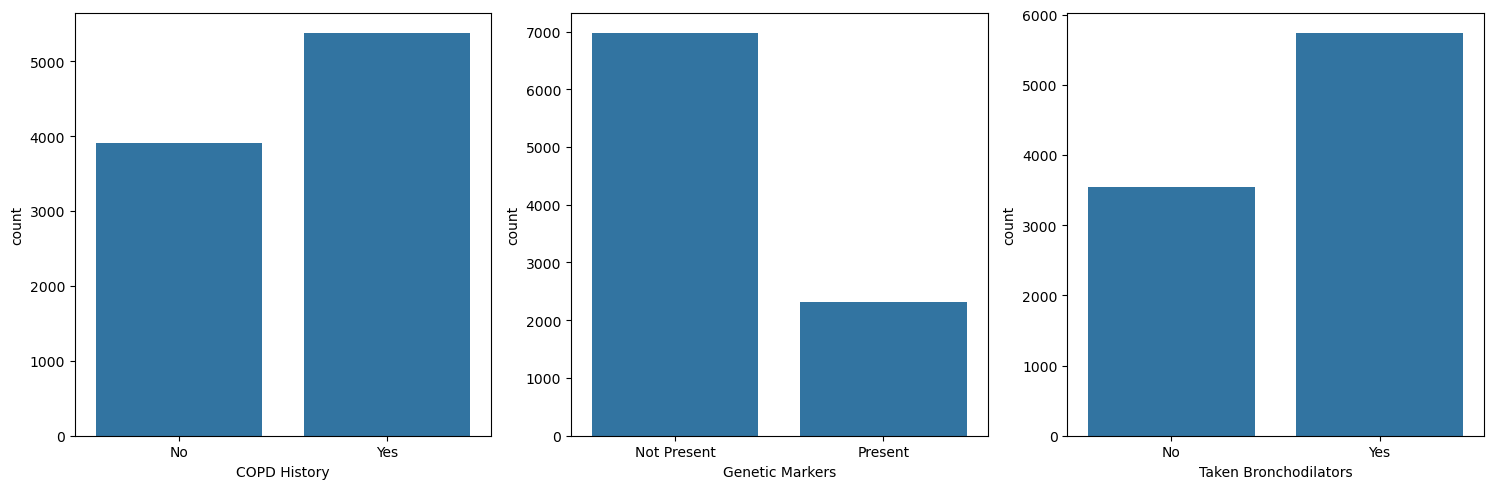

In [13]:
bar_plot(4, 1, data[binary_features], sns.countplot)

Findings:
'Genetic Markers' has imbalanced categories. 

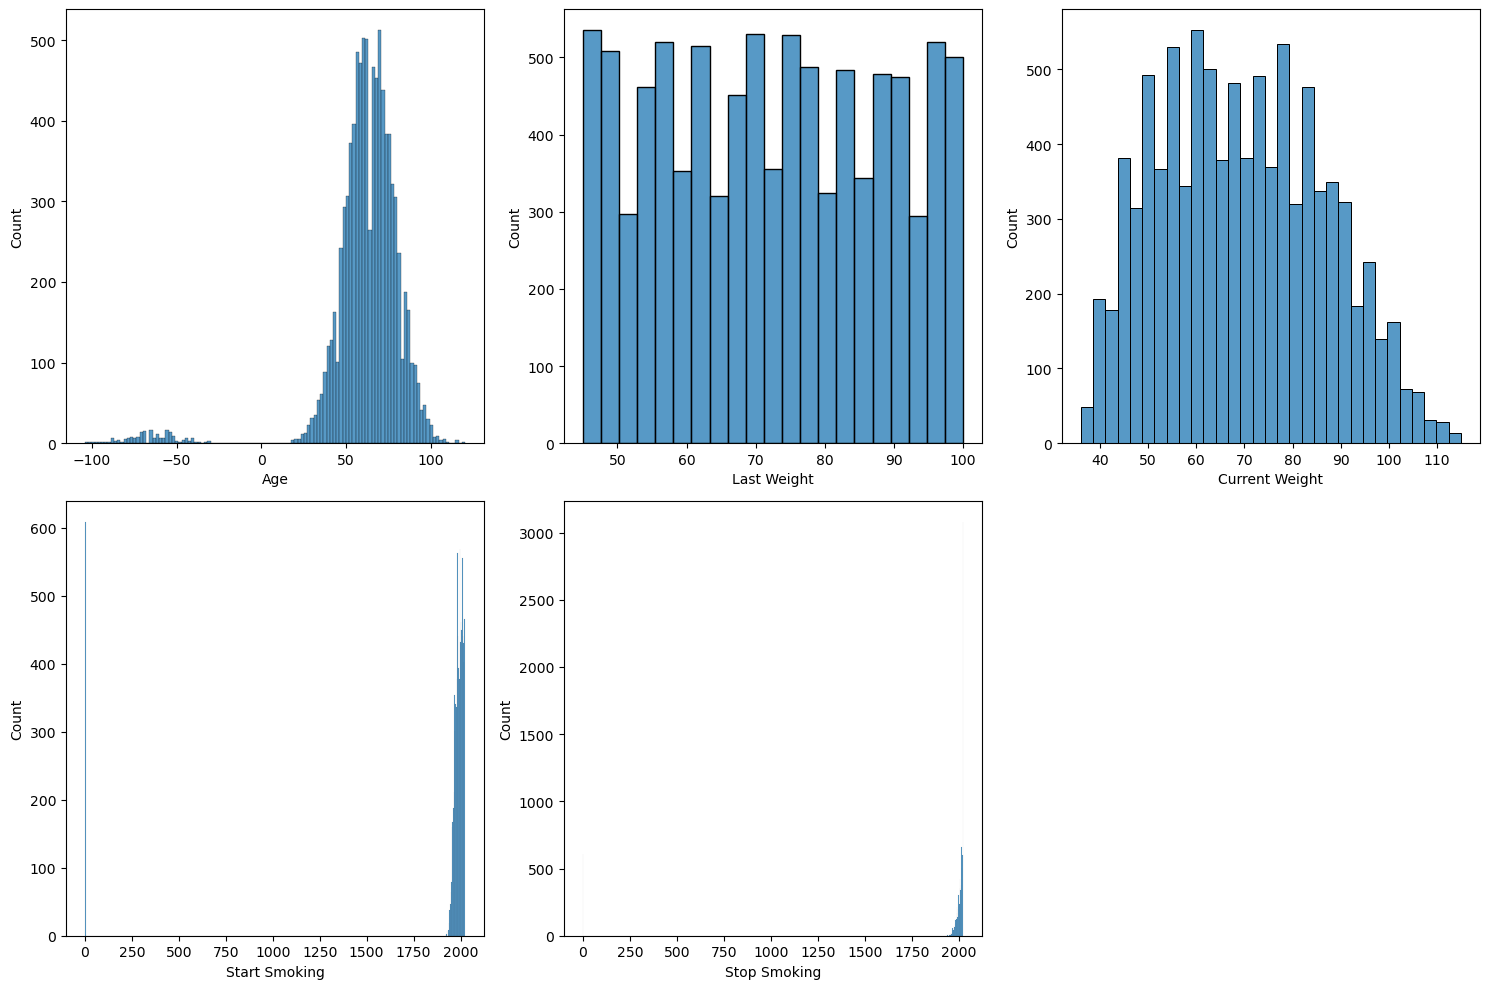

In [14]:
bar_plot(3, 2, data[numerical_features], sns.histplot)

Findings:
- 'Age' has outliers and is skewed to the right with negative values.
- 'Start Smoking' and 'Stop Smoking' are slightly skewed to the right.

<Axes: title={'center': 'Gender Frequency'}, ylabel='count'>

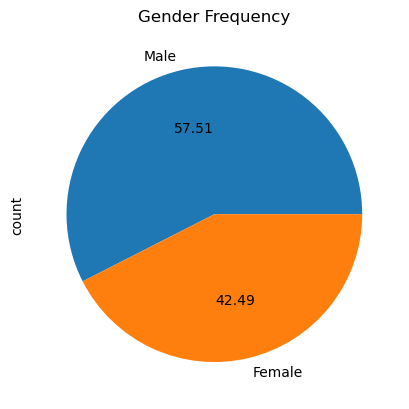

In [15]:
data['Gender'].value_counts().plot(kind='pie', autopct='%.2f', title='Gender Frequency')

No indications of imbalanced categories.

<Axes: title={'center': 'Dominant Hand frequency'}, ylabel='count'>

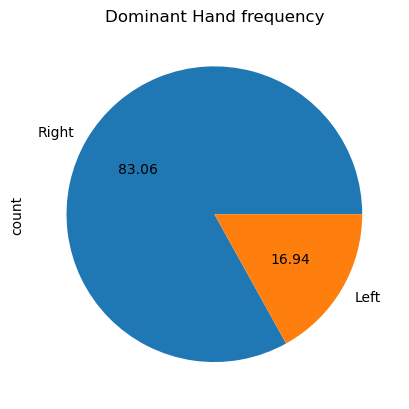

In [16]:
data['Dominant Hand'].value_counts().plot(kind='pie', autopct='%.2f', title='Dominant Hand frequency')

Obvious signs of imbalanced categories.

In [17]:
def horizontal_bar_plot(cols, rows, df, plot):
    '''
    Plot bar charts to examine data distribution across binary and numerical features.

    Parameters:
    -----------
    - cols (Variable): Number of columns showcasing the feature plots in the pane
    - rows (Variable): Number of rows showcasing the feature plots in the pane
    - df (pd.DataFrame): The input DataFrame
    - plot (function): The type of plot to use for the selected features 

    Returns:
    --------
    - A single pane containing multiple bar plots showcasing various data distributions of binary and numerical features

    '''
    fig = plt.figure(figsize = (cols*5, rows*5))

    for i, col in enumerate(df):
        ax = fig.add_subplot(rows, cols, i + 1)
        plot(y = data[col], ax = ax)
    fig.tight_layout()
    plt.show()

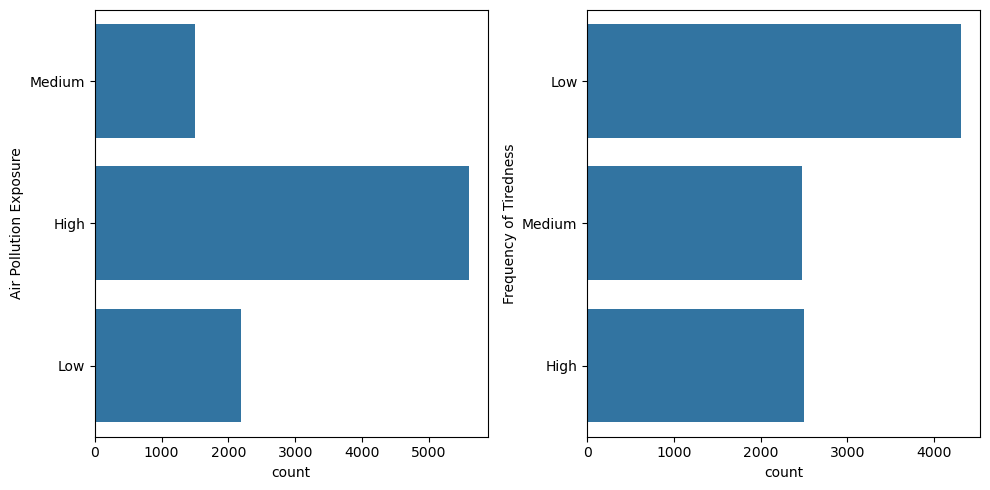

In [18]:
horizontal_bar_plot(2, 1, data[ordinal_features], sns.countplot)

Findings:
- 'Air Pollution Exposure' and 'Frequency of Tiredness' have imbalanced data

## 5. Detect and handle outliers

In [19]:
def outlier_detection(data, features, plot):
    '''
    Detect outliers for multiple features in a single visualization pane

    Parameters:
    -----------
    - data (DataFrame): The DataFrame to use for plotting graphs.
    - features (variables): Input feature(s) in DataFrame
    - plot (function): The type of plot to use for input features

    Returns:
    --------
    Multiple plots in a single pane
    '''

    fig = plt.figure(figsize=(10,6))
    plot(data[features])
    fig.tight_layout()
    plt.title('Outliers Detection')
    plt.show()

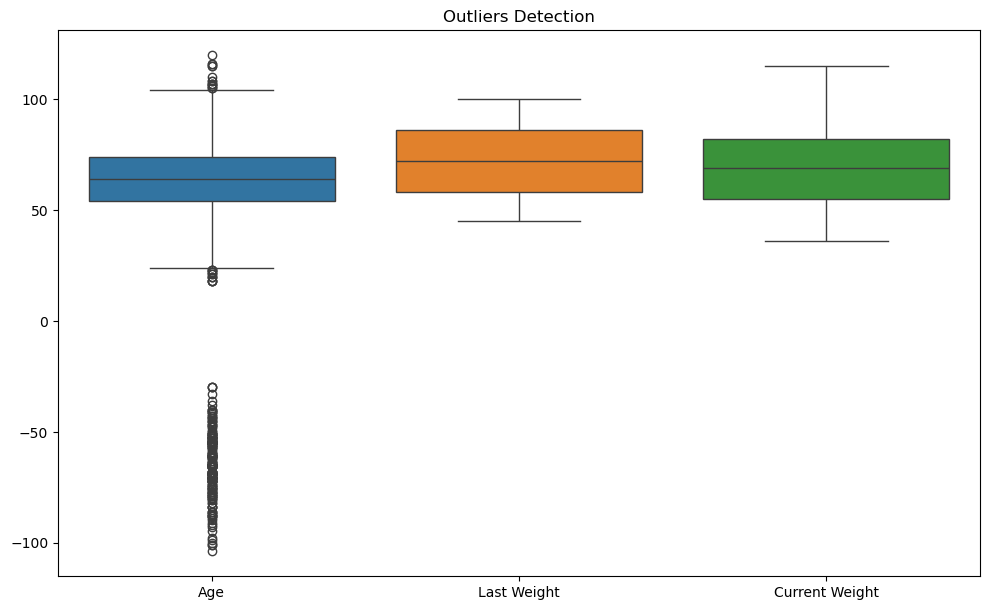

In [20]:
outlier_detection(data, ['Age', 'Last Weight', 'Current Weight'], sns.boxplot)

In [21]:
#Create smokers only data to get a clearer view of the data distribution for smokers
df = []
df = pd.DataFrame(df)
df['start_smoke'] =  data['Start Smoking'].loc[data['Start Smoking'] != 0]
df['stop_smoke'] = data['Stop Smoking'].loc[data['Stop Smoking'] != 0]

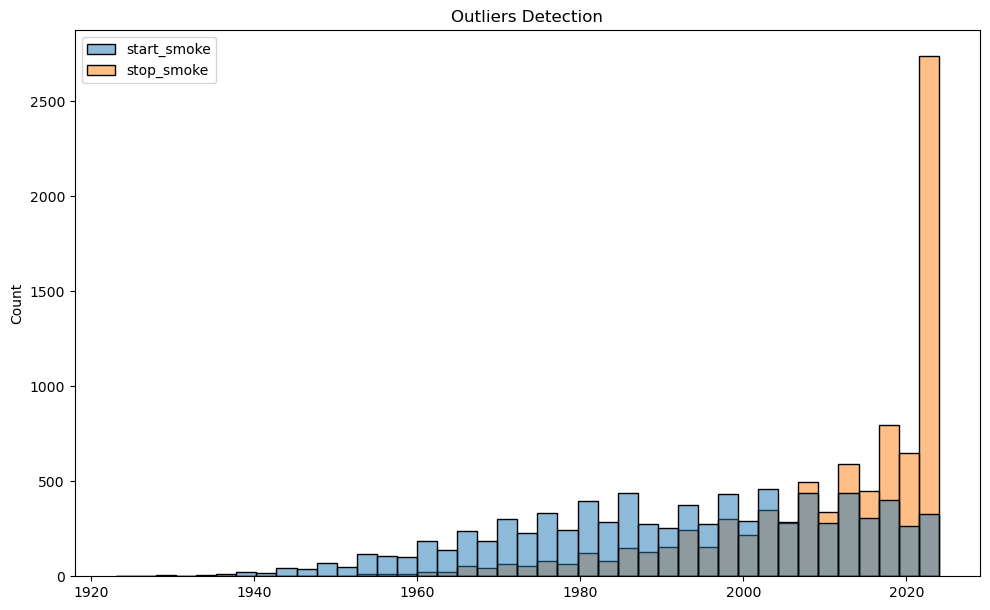

In [22]:
outlier_detection(df, ['start_smoke', 'stop_smoke'], sns.histplot)

Based on the above visual analysis:
There're outliers present in features:
- 'Age': Outliers above Q3 will retain as it is, as it is possible for human age to go above 100 years, however outliers below value 0 will be converted to positive.
         It is impossible for human age to be negative.
- 'Start Smoking': Outliers below Q1 will retain as it is, as the time-series data in year format shows actual data of the smokers' information.
- 'Stop Smoking': Same application as 'Start Smoking'.

Findings:
- This dataset has a higher ratio of senior patients starting from age 60 given that the tail from Q3 and above is longer.
- The variation of the patients' weight increased since previously measured as compared to the current.
- Number of smokers whom quit smoking increased along the years and surged after 2020.

## 6. Feature Engineering

Features to apply feature engineering on:
- Transform negative values to positive values in feature 'Age'.
- Relabel features for efficient access during functional operations.
- Create new features, 'weight_change' and 'smoking_duration' to find the differences between weight features and smoking features.

In [23]:
#Transform negative values to positive
data['Age'] = abs(data['Age']) 

#Relabel features
data = data.rename(columns={'Age': 'age',
                            'Gender': 'gender',
                            'COPD History': 'copd',
                            'Genetic Markers': 'gene_markers',
                            'Air Pollution Exposure': 'air_pollution_level',
                            'Last Weight': 'last_weight',
                            'Current Weight': 'new_weight',
                            'Start Smoking': 'start_smoking',
                            'Stop Smoking': 'stop_smoking',
                            'Taken Bronchodilators': 'bronchodilators',
                            'Frequency of Tiredness': 'tiredness_frequency', 
                            'Dominant Hand': 'dominant_hand', 
                            'Lung Cancer Occurrence': 'lung_cancer'})

#Create new features
data['weight_change'] = data['last_weight'] - data['new_weight']
data['smoking_duration'] = data['stop_smoking'] - data['start_smoking']

#Drop old features
data = data.drop(['last_weight', 'new_weight', 'stop_smoking', 'start_smoking'], axis=1)
data1 = data.copy(deep=True) # Clone clean dataset for analysis purposes
data1.head()

,age,gender,copd,gene_markers,air_pollution_level,bronchodilators,tiredness_frequency,dominant_hand,lung_cancer,weight_change,smoking_duration
0,42,Male,No,Not Present,Medium,No,Low,Right,1,4,5
1,72,Male,Yes,Not Present,High,Yes,Medium,Right,1,8,6
2,65,Male,Yes,Not Present,Low,Yes,Low,Right,0,-10,25
3,67,Male,No,Not Present,High,No,Low,Right,1,11,3
4,54,Male,Yes,Not Present,Medium,Yes,Low,Right,0,6,23


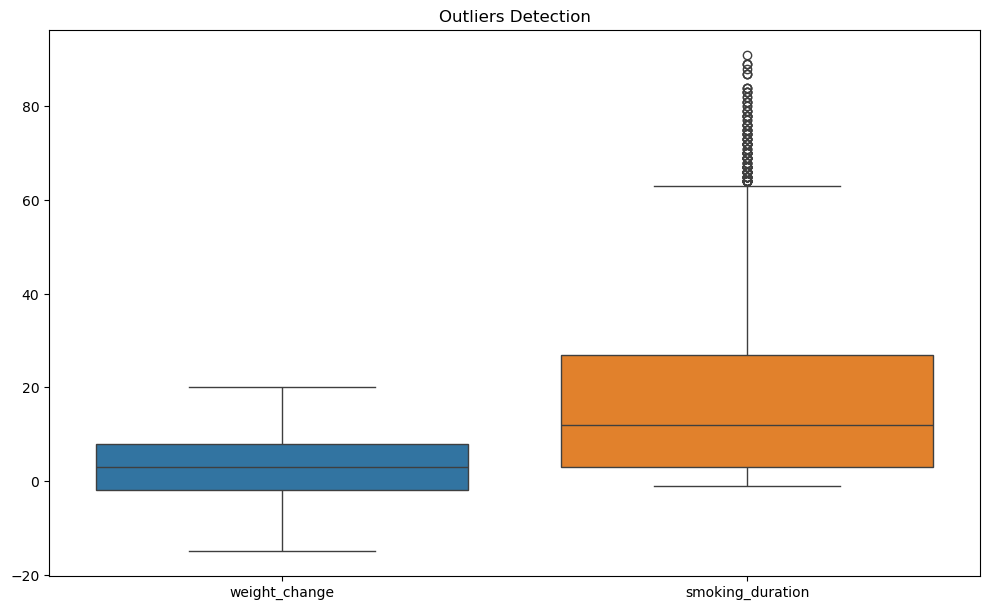

In [24]:
#Check the distribution of newly created features
outlier_detection(data1, ['weight_change', 'smoking_duration'], sns.boxplot)

## 7. Analyse relationship between features

In [25]:
def corr_analysis(features, corr_method, title):
    '''
    Plot heatmap of correlation matrix for selected features in dataset

    Parameters:
    -----------
    - features (variables): Input feature(s) in DataFrame
    - corr_method (function): The type of correlation method used to analysis relationship between selected features
    - title (string): The title of the correlation analysis

    Returns:
    --------
    Heatmap matrix showcasing correlation figures between selected features 

    '''
    #Select continuous variables
    corr_vars_all = data1[features]

    #Calculate the correlation matrix for selected features
    corr_matrix = corr_vars_all.corr(method=corr_method)

    #Plot heatmap of correlation matrix for selected features
    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, center=0.5, vmax=1,
                linewidths=0.5, fmt=".2f")
    plt.title(title)
    plt.show()

In [26]:
#Split data into continuous and categorical categories.
binary_features = ['copd', 'gene_markers', 'bronchodilators', 'gender', 'dominant_hand']
ordinal_features = ['air_pollution_level', 'tiredness_frequency']
continuous_vars = ['age', 'weight_change', 'smoking_duration']

In [27]:
def factorize_columns(cols):
    '''
    Encode string values with unique integers across multiple categorical features

    Parameters:
    -----------
    - cols (variables): Columns(features) extracted from the DataFrame

    Returns:
    --------
    Features with encoded data
    '''
    for col in cols:
        data1[col], _ = pd.factorize(data1[col])
    return data1

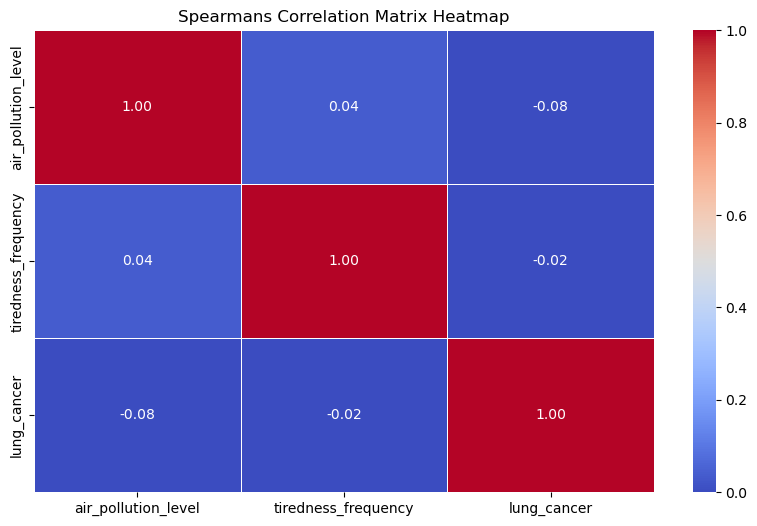

In [28]:
from scipy.stats import spearmanr

#Encode string values with unique integers
factorize_columns(ordinal_features)

#Analyse correlation between ordinal features and target feature
corr_analysis(['air_pollution_level', 'tiredness_frequency', 'lung_cancer'], 'spearman', 'Spearmans Correlation Matrix Heatmap')

Findings:
There is little to no correlation between the ordinal features and target feature.

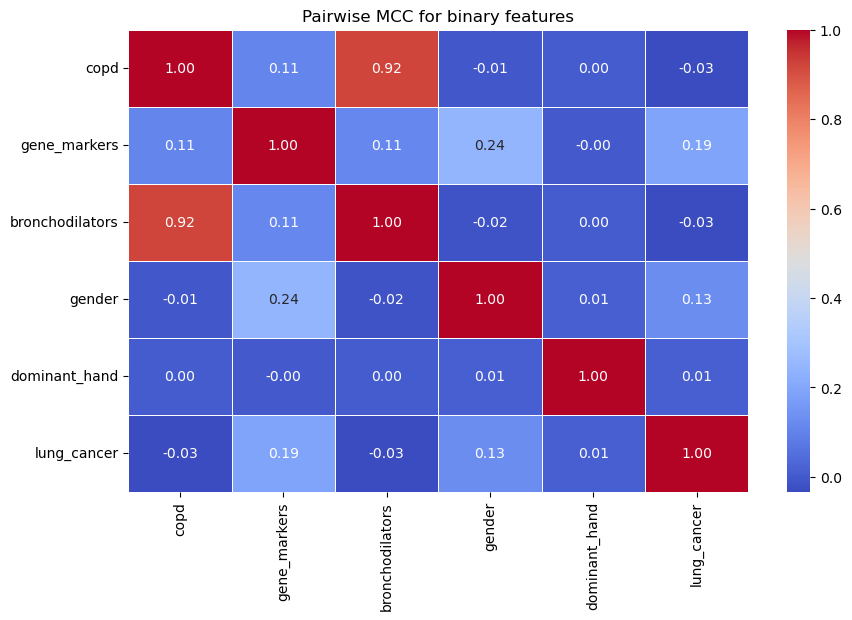

In [29]:
from sklearn.metrics import matthews_corrcoef
import itertools

def compute_pairwise_mcc(columns):
    '''
    Compute Matthews Correlation Coefficient (MCC) for all pairs of binary features.

    Parameters:
    -----------
    - columns (variables): Features in DataFrame

    Returns:
    --------
    dict: Pairwise MCC for each pair of binary features.
    '''
    
    mcc_results = {}

    # Loop through all unique pairs of columns
    for col1, col2 in itertools.combinations(columns, 2):
        # Ensure binary features are in 0/1 format
        if sorted(data1[col1].unique()) == [0, 1] and sorted(data1[col2].unique()) == [0, 1]:
            mcc = matthews_corrcoef(data1[col1], data1[col2])
            mcc_results[(col1, col2)] = mcc
        else:
            raise ValueError(f"One of the columns ({col1} or {col2}) is not binary (0/1).")

    return mcc_results

# Encode string values in binary features and change to type 'float'
factorize_columns(binary_features)
data1[['copd', 'gene_markers', 'bronchodilators', 'gender', 'dominant_hand', 'lung_cancer']] = data1[['copd', 'gene_markers', 'bronchodilators', 'gender', 'dominant_hand', 'lung_cancer']].astype('float')

# Columns to calculate MCC for
mcc_vars = ['copd', 'gene_markers', 'bronchodilators', 'gender', 'dominant_hand', 'lung_cancer']

# Compute pairwise MCC
mcc_results = compute_pairwise_mcc(mcc_vars)

# Convert MCC results to a square matrix
mcc_matrix = pd.DataFrame(np.eye(len(mcc_vars)), index=mcc_vars, columns=mcc_vars)
for (col1, col2), mcc in mcc_results.items():
    mcc_matrix.loc[col1, col2] = mcc
    mcc_matrix.loc[col2, col1] = mcc # Fill symmetric values

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mcc_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pairwise MCC for binary features")
plt.show()

Findings:
There is a weak positive correlation between 'gene_markers', 'gender' and target feature.

In [30]:
from scipy.stats import pointbiserialr

def pbiserial_coeff(cont_features, binary_features, robust):
    '''
    Compute Point-Biserial coefficient between continuous and binary features.

    Parameters:
    -----------
    continuous_features (variable): Continuous features in the DataFrame to be analysed.
    binary_features (variable): Binary features in the DataFrame to be analysed.

    Returns:
    --------
    Correlation coefficient and p-value between each pair of continuous and binary features.
    '''
    X = data1[cont_features]
    y = data1[binary_features]

    # Initialise results dictionary
    corr_results = {}
    # Iterate over features and calculate point-biserial correlation
    for feature in X:
        corr, p_value = pointbiserialr(y, data1[feature])
        corr_results[feature] = {'Correlation': corr, 'P_value': p_value}

    # Display results
    for feature, stats in corr_results.items():
        print(f"Feature: {feature}")
        print(f"  Correlation: {stats['Correlation']:.2f}")
        print(f"  P-value: {stats['P_value']:.4f}")

In [31]:
pbiserial_coeff(continuous_vars, 'lung_cancer', robust=True)

Feature: age
  Correlation: 0.01
  P-value: 0.2367
Feature: weight_change
  Correlation: 0.40
  P-value: 0.0000
Feature: smoking_duration
  Correlation: -0.03
  P-value: 0.0132


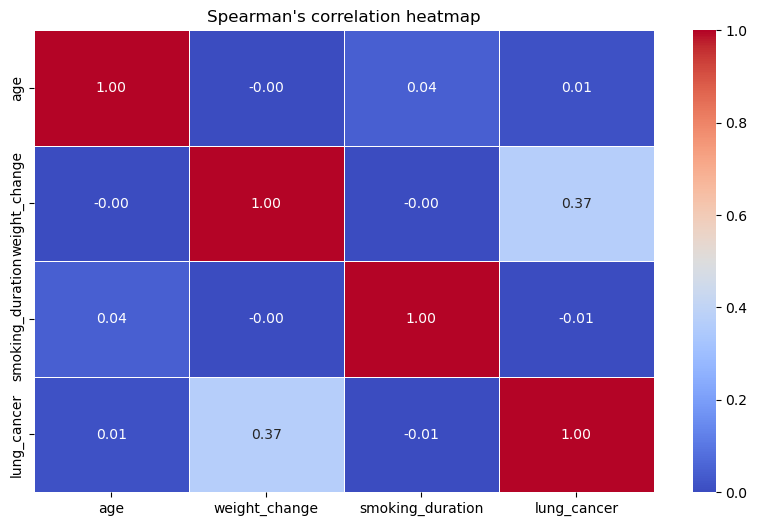

In [32]:
# Calculate correlation strength between continuous variables and binary target feature
corr_analysis(['age', 'weight_change', 'smoking_duration', 'lung_cancer'], 'spearman', "Spearman's correlation heatmap")

Findings:
Upon doing cross-comparison between 2 types of correlation analysis between continuous features and target feature, 'weight_change' holds some significant correlation with the target feature.

## 8. Bivariate and multivariate analysis

In [33]:
def scatter(feature, target, hue):
    '''
    Plot scatterplot with jitter for vizualising relationships between variables.

    Parameters:
    -----------
    - feature (str or Series): The main variable to plot on the x-axis. Typically numeric or categorical.
    - hue (str or Series): A categorical or numeric variable to color the points, adding a third dimension to the scatterplot.

    Returns:
    --------
    None: Displays a scatterplot with jitter for enhanced vizualisation.
    '''

    # Add jitter to features
    feature1_jitter = data1[feature] + np.random.normal(0, 0.05, len(data1))
    target_feature = data1[target] + np.random.normal(0, 0.5, len(data1))

    # Plot scatterplot
    sns.scatterplot(data=data1, x=feature1_jitter, y=target_feature, hue=hue)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')
    plt.show()

### Bivariate analysis between relevant binary features and target feature.

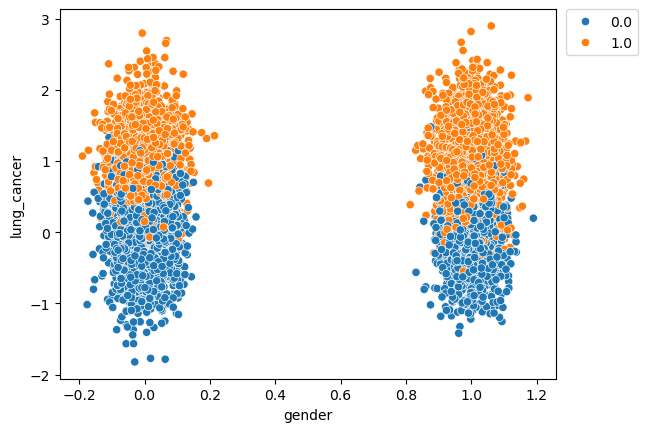

In [34]:
scatter('gender', 'lung_cancer', 'lung_cancer')

In [35]:
data1['gender'].head() 

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: gender, dtype: float64

Findings:
- 0 stands for Male and 1 stands for Female after factorization.
- Lung cancer occurs more in Female since the variation of lung cancer occurrence is wider for female.

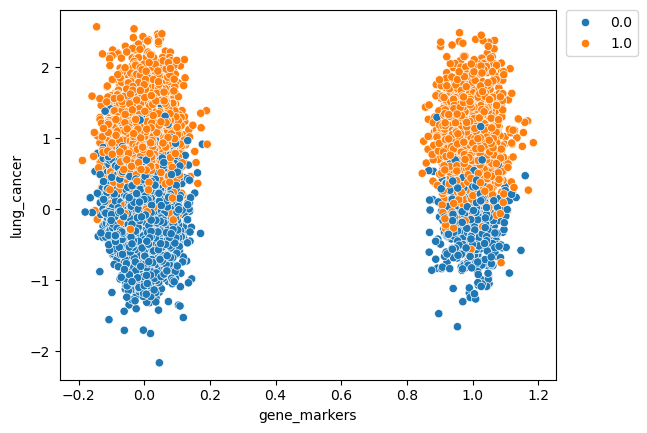

In [36]:
scatter('gene_markers', 'lung_cancer', 'lung_cancer')

In [37]:
data1['gene_markers'].head() # 0 - Not Present, 1 - Present

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: gene_markers, dtype: float64

Findings:
- 0 stands for 'Not Present' and 1 stands for 'Present'
- Lung cancer occurs more in people whom have genetic histories of lung cancer occurrence.

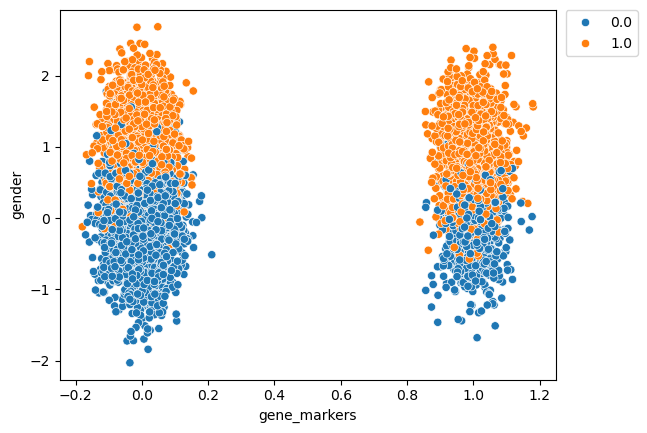

In [38]:
scatter('gene_markers', 'gender', 'gender')

Findings:
There are more females with genetic histories of lung cancer occurrence.

### Bivariate analysis between relevant continuous feature and target feature.

C:\Users\gshbo\AppData\Local\Temp\ipykernel_16760\997355985.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=binary_target, y=continuous_feature, palette='pastel')


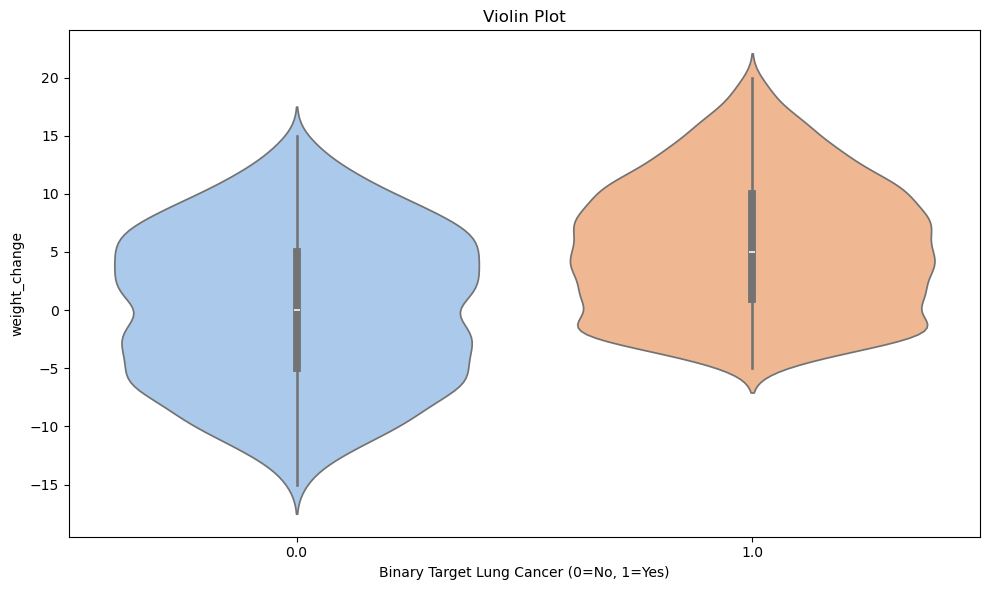

In [39]:
binary_target = data1['lung_cancer']
continuous_feature = data1['weight_change']

# Set figure size
plt.figure(figsize=(10,6))

# Create violin plot
sns.violinplot(x=binary_target, y=continuous_feature, palette='pastel')

# Add labels and title
plt.title('Violin Plot', fontsize=12)
plt.xlabel('Binary Target Lung Cancer (0=No, 1=Yes)')
plt.ylabel('weight_change')

# show the plot
plt.tight_layout()
plt.show()

Findings:
- The weight change is higher and more concentrated for people with lung cancer history.
- People with lung cancer tend to have a higher increase in weight than weight loss. 

### Multivariate analysis between relevant features:
- lung_cancer
- gender
- gene_markers
- weight change

### Recap:
* gender: 0 = Male, 1 = Female
* gene_markers: 0 = Not Present, 1 = Present 

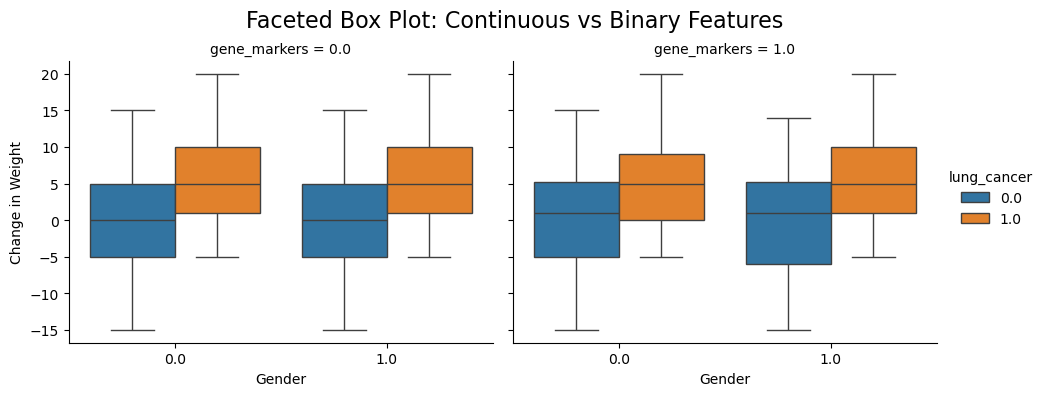

In [40]:
# Plot Faceted Box Plot
g_box = sns.catplot(
    data=data1, kind="box",
    x='gender', y='weight_change', hue='lung_cancer',
    col='gene_markers', height=4, aspect=1.2
)
g_box.set_titles("gene_markers = {col_name}")
g_box.set_axis_labels("Gender", "Change in Weight")
plt.subplots_adjust(top=0.85)
g_box.fig.suptitle("Faceted Box Plot: Continuous vs Binary Features", fontsize=16)
plt.show()


Findings:
- Consistent median for change in weight across Male and Female categories for lung cancer history.
- The risk of lung cancer increases for people whom experiences a huge increase in weight as compared to people without lung cancer history.
- The highest weight increase stretches out to 20kg and a decrease of 5kg in weight for people with lung cancer history.
- Given the proportion of Male being abit higher than Female, the median is similar across all categories for gene_makers = 0 and 1.
- Majority of Female without genetic markers and experiences lung cancer history experiences a slightly wider range of change in weight as compared to Female with genetic markers.
- Proportion of Male with lung cancer history and has genetic markers is the same for Male without genetic markers.
- Minor difference between genetic markers for Male in change in weight range, Male with lung cancer history and has genetic markers tend to experience lower change in weight more.
- Overall, the differences across the categories does not show much difference and hence shows a weak relationship, statistical tests will be required to test the significance.

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def three_way_anova(dependent_var, var1, var2, var3):
    '''
    Build a three-way anova model to find the significance between 3 features and
    target feature.

    Parameters:
    -----------
    dependent_var (variable): Target binary variable
    var1 (variable): Binary feature column
    var2 (variable): Binary feature column
    var3 (variable): Continuous feature column

    Returns:
    --------
    ANOVA test model results
    '''
    # Fit three-way anova model
    model = ols(
        f'{dependent_var} ~ C({var1}) + C({var2}) + {var3} + '
        f'C({var1}):C({var2}) + C({var1}):{var3} + '
        f'C({var2}):{var3} + C({var1}):C({var2}):{var3}',
        data=data1
        ).fit()
    
    # Perform ANOVA test
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

In [42]:
three_way_anova('lung_cancer', 'gender', 'gene_markers', 'weight_change')

                                              sum_sq      df            F  \
C(gender)                                  12.000745     1.0    59.988550   
C(gene_markers)                            45.644286     1.0   228.163720   
C(gender):C(gene_markers)                  13.808756     1.0    69.026321   
weight_change                             325.715958     1.0  1628.167975   
C(gender):weight_change                     0.002684     1.0     0.013415   
C(gene_markers):weight_change               2.045765     1.0    10.226237   
C(gender):C(gene_markers):weight_change     0.545730     1.0     2.727961   
Residual                                 1856.069342  9278.0          NaN   

                                               PR(>F)  
C(gender)                                1.054188e-14  
C(gene_markers)                          6.032165e-51  
C(gender):C(gene_markers)                1.108051e-16  
weight_change                            0.000000e+00  
C(gender):weight_change   

Findings:
- Change in weight has the highest significance to lung cancer occurrence.
- Second most significant feature is gene_markers followed by gender.
- There is no significant interaction between gender and weight_change.
- In conclusion, all features are significant to the target variable 'lung_cancer' standalone and will be used to build the ML model.

In [43]:
three_way_anova('lung_cancer', 'copd', 'bronchodilators', 'smoking_duration')

                                                   sum_sq      df  \
C(copd)                                     -4.303207e-07     1.0   
C(bronchodilators)                           2.738348e+00     1.0   
C(copd):C(bronchodilators)                   8.081356e-03     1.0   
smoking_duration                             1.715935e+00     1.0   
C(copd):smoking_duration                     7.784032e-08     1.0   
C(bronchodilators):smoking_duration          4.456045e+00     1.0   
C(copd):C(bronchodilators):smoking_duration  6.661402e-02     1.0   
Residual                                     2.295905e+03  9280.0   

                                                        F    PR(>F)  
C(copd)                                     -1.739347e-06  1.000000  
C(bronchodilators)                           1.106835e+01  0.000882  
C(copd):C(bronchodilators)                   3.266467e-02  0.856581  
smoking_duration                             6.935774e+00  0.008463  
C(copd):smoking_duration    

Findings:
- smoking_duration is highly significant to lung cancer occurrence.
- copd and bronchodilators are insignificant to lung cancer occurrence and smoking duration.
- smoking_duration will be added to the model.

In [44]:
three_way_anova('lung_cancer', 'tiredness_frequency', 'air_pollution_level', 'age')

                                                        sum_sq      df  \
C(tiredness_frequency)                                0.299542     2.0   
C(air_pollution_level)                               33.906602     2.0   
C(tiredness_frequency):C(air_pollution_level)        24.577535     4.0   
age                                                   0.000649     1.0   
C(tiredness_frequency):age                           26.470239     2.0   
C(air_pollution_level):age                            5.221257     2.0   
C(tiredness_frequency):C(air_pollution_level):age     0.762209     4.0   
Residual                                           2223.602709  9268.0   

                                                           F        PR(>F)  
C(tiredness_frequency)                              0.624246  5.356876e-01  
C(air_pollution_level)                             70.661541  3.497061e-31  
C(tiredness_frequency):C(air_pollution_level)      25.609858  3.897161e-21  
age                      

Findings:
- tiredness_frequency and age are insignificant to lung cancer occurrence standalone.
- air_pollution_level is highly significant to lung cancer occurrence standalone.
- tiredness_frequency and air_pollution_level is highly significant to lung cancer occurrence when its a 2-way interaction.
- age and air_pollution_level is highly significant to lung cancer occurrence when its a 2-way interaction.
- Though the 3-way interaction is insignificant to lung cancer, there is a high significance in the 2-way interaction between air_pollution_level and the other variables.
- All 3 variables will be included in the model.

In [45]:
three_way_anova('lung_cancer', 'dominant_hand', 'gene_markers', 'weight_change')

                                                     sum_sq      df  \
C(dominant_hand)                                   0.217352     1.0   
C(gene_markers)                                   60.983937     1.0   
C(dominant_hand):C(gene_markers)                   0.047801     1.0   
weight_change                                    336.036281     1.0   
C(dominant_hand):weight_change                     0.055416     1.0   
C(gene_markers):weight_change                      1.011909     1.0   
C(dominant_hand):C(gene_markers):weight_change     0.071101     1.0   
Residual                                        1882.059216  9278.0   

                                                          F        PR(>F)  
C(dominant_hand)                                   1.071481  3.006382e-01  
C(gene_markers)                                  300.632925  2.643252e-66  
C(dominant_hand):C(gene_markers)                   0.235647  6.273793e-01  
weight_change                                   1656.560

Findings:
- dominant_hand has no significance to the dependent variable and other variables.
- dominant_hand will not be included in the model.

## 9. Summary of Findings
- Risk of lung cancer occurrence increases for people experiencing huge increase in weight.
- The correlation between features and target variable is weak.
- There is a weak relationship between features with slightly higher correlation coefficients to the target variable.
- List of features significant to the target variable upon conducting statistical ANOVA tests:
  - gender
  - gene_markers
  - weight_change
  - smoking_duration
  - tiredness_frequency
  - air_pollution_level
  - age

## 10. Export Clean Dataset
- Clean dataset will be exported to .csv file for model building purposes in .py file format.

In [46]:
data = data.drop(columns=['copd', 'bronchodilators', 'dominant_hand'])
print(data.head())
print("")
print(data.info())

   age gender gene_markers air_pollution_level tiredness_frequency  \
0   42   Male  Not Present              Medium                 Low   
1   72   Male  Not Present                High              Medium   
2   65   Male  Not Present                 Low                 Low   
3   67   Male  Not Present                High                 Low   
4   54   Male  Not Present              Medium                 Low   

  lung_cancer  weight_change  smoking_duration  
0           1              4                 5  
1           1              8                 6  
2           0            -10                25  
3           1             11                 3  
4           0              6                23  

<class 'pandas.core.frame.DataFrame'>
Index: 9286 entries, 0 to 10347
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9286 non-null   int64 
 1   gender               9286 non-

In [47]:
data.to_csv("C:/Users/gshbo/Documents/AI Materials/Lung Cancer Analysis/data/data_clean.csv", index=False)